In [7]:
from pathlib import Path
import pandas as pd
import numpy as np

ROOT = Path.cwd()
DATA = ROOT / "data"               
OUT  = DATA / "08_reporting"       
OUT.mkdir(parents=True, exist_ok=True)

def first_existing(*candidates: Path) -> Path | None:
    for p in candidates:
        if p.exists():
            return p
    return None

print("ROOT:", ROOT)
print("DATA:", DATA)
print("OUT :", OUT)


ROOT: /app/notebooks/08_reporting
DATA: /app/notebooks/08_reporting/data
OUT : /app/notebooks/08_reporting/data/08_reporting


In [10]:
p_clf_results = first_existing(
    OUT / "clf_results_table.csv"
)

p_metrics = first_existing(
    OUT / "final_eval_metrics.csv"
)

p_conf = first_existing(
    OUT / "final_confusion_matrix.csv"
)

p_roc = first_existing(
    OUT / "final_roc_curve.csv"
)

missing = [("clf_results_table", p_clf_results),
           ("final_eval_metrics", p_metrics),
           ("final_confusion_matrix", p_conf),
           ("final_roc_curve", p_roc)]
print({name: bool(p) for name, p in missing})

if p_clf_results is None:
    raise FileNotFoundError("No encuentro clf_results_table.csv en 08_reporting. Revisa el pipeline de evaluación.")
if p_metrics is None:
    raise FileNotFoundError("No encuentro final_eval_metrics.csv en 08_reporting.")
if p_conf is None:
    raise FileNotFoundError("No encuentro final_confusion_matrix.csv en 08_reporting.")
if p_roc is None:
    raise FileNotFoundError("No encuentro final_roc_curve.csv en 08_reporting.")

clf_results = pd.read_csv(p_clf_results)
metrics_df  = pd.read_csv(p_metrics)
conf_df     = pd.read_csv(p_conf, index_col=0)
roc_df      = pd.read_csv(p_roc)
clf_results.head()


{'clf_results_table': False, 'final_eval_metrics': False, 'final_confusion_matrix': False, 'final_roc_curve': False}


FileNotFoundError: No encuentro clf_results_table.csv en 08_reporting. Revisa el pipeline de evaluación.

In [11]:
import os
import pandas as pd

OUT_DIR = DATA / "08_reporting"
OUT_DIR.mkdir(parents=True, exist_ok=True)

sort_cols = [c for c in ["cv_best_score", "f1"] if c in clf_results.columns]
ascending = [False] * len(sort_cols)

top_n = 10  # cambia si quieres
top_table = clf_results.sort_values(sort_cols, ascending=ascending).head(top_n)

display(top_table)

#resumen lindoo
top_path = OUT_DIR / "top_models_summary.csv"
top_table.to_csv(top_path, index=False)
print("Top-N guardado en:", top_path)


NameError: name 'clf_results' is not defined

NameError: name 'confusion_df' is not defined

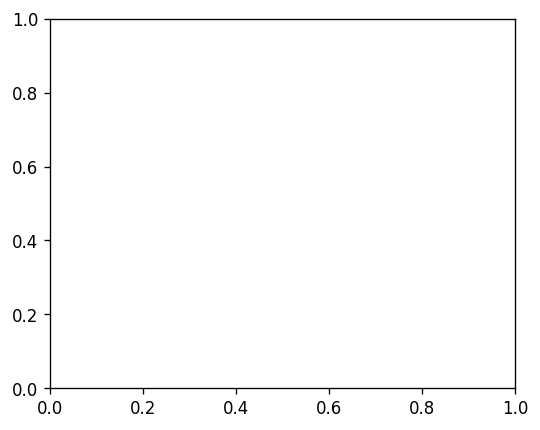

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
sns.heatmap(
    confusion_df,
    annot=True, fmt="d", cmap="Blues",
    cbar=False, ax=ax
)
ax.set_title("Matriz de confusión")
ax.set_xlabel("Predicho")
ax.set_ylabel("Real")
plt.tight_layout()

cm_path = OUT_DIR / "confusion_matrix.png"
plt.savefig(cm_path, bbox_inches="tight")
print("Matriz de confusión guardada en:", cm_path)
plt.show()


NameError: name 'roc_curve_df' is not defined

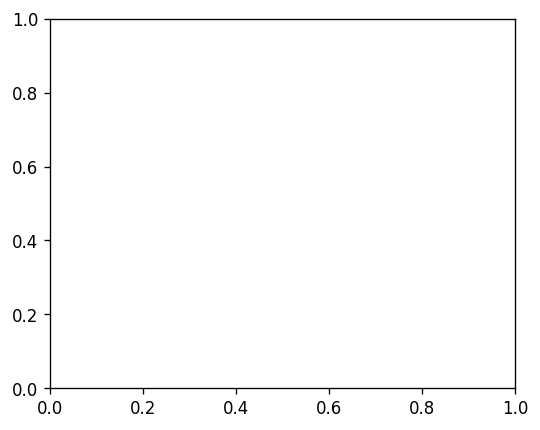

In [13]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=120)
ax.plot(roc_curve_df["fpr"], roc_curve_df["tpr"], lw=2, label="ROC")
ax.plot([0, 1], [0, 1], "--", lw=1, color="gray", label="Azar")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_xlabel("FPR (1 - Especificidad)")
ax.set_ylabel("TPR (Recall)")
ax.set_title("Curva ROC")
ax.legend()
plt.tight_layout()

roc_path = OUT_DIR / "roc_curve.png"
plt.savefig(roc_path, bbox_inches="tight")
print("Curva ROC guardada en:", roc_path)
plt.show()


In [14]:
mcols = ["f1", "recall", "precision", "roc_auc"]
available = [c for c in mcols if c in metrics_df.columns]
plot_df = metrics_df[available].T.reset_index()
plot_df.columns = ["metric", "value"]

fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
sns.barplot(data=plot_df, x="metric", y="value", ax=ax)
ax.set_ylim(0, 1)
ax.set_title("Métricas finales del mejor modelo")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=9)
plt.tight_layout()

bars_path = OUT_DIR / "final_metrics_bars.png"
plt.savefig(bars_path, bbox_inches="tight")
print("Barras de métricas guardadas en:", bars_path)
plt.show()


NameError: name 'metrics_df' is not defined

In [15]:
cols = [c for c in ["model","cv_best_score","f1","recall","precision","roc_auc","best_params"] if c in clf_results.columns]
leaderboard = clf_results[cols].sort_values([c for c in ["cv_best_score","f1"] if c in cols], ascending=False)
display(leaderboard.head(20))

lb_path = OUT_DIR / "leaderboard_clean.csv"
leaderboard.to_csv(lb_path, index=False)
print("Leaderboard guardado en:", lb_path)


NameError: name 'clf_results' is not defined